#### FrozenLake 게임 환경 생성

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random
%matplotlib inline

# pip install gym

# 최대값이 모두 같을 때 random하게 return하도록 작성한 코드.  
def rargmax(vector):     
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return random.choice(indices)

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

#### Q table 초기화

In [2]:
# Q를 모두 0으로 초기화. Q[16,4]
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_episodes = 2000

#### 강화 학습 (Q learning을 통한) 
학습을 하면서 게임을 하므로 게임 초반에는 실패가 많으나 후반으로 갈수록 성공 확률이 높아진다.

In [3]:
# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes): # 여러번 반복 학습 
    state = env.reset() # 환경 reset 후, 첫번째 상태 얻음 
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # 현재 state의 Q중 최대 reward를 얻을 수 있는 action을 구함. 
        action = rargmax(Q[state, :])

        # 환경에서 action 후, new_state와 reward를 얻음
        # action( 0 - left, 1 -douwn, 2-right, 3-up )
        new_state, reward, done, _ = env.step(action)
         
        # Q-Table 갱신
        Q[state, action] = reward + np.max(Q[new_state, :])

        rAll += reward
        state = new_state
    rList.append(rAll)

#### 게임 결과 출력
(학습을 하면서 게임을 하므로 게임 초반에는 실패가 많으나 후반으로 갈수록 성공 확률이 높아진다.)

Success rate: 0.9825
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


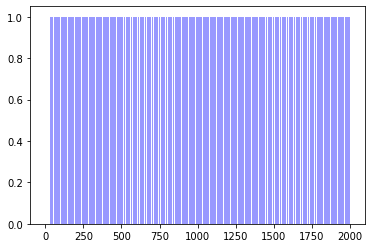

In [4]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)

plt.bar(range(len(rList)), rList, color="b", alpha=0.4)
plt.show()